In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import curve_fit
from matplotlib.ticker import LogFormatterSciNotation

In [2]:
path = r'..\data\20211209_viscosity_N1_raw_data.xlsx'
path_2 = r'..\data\20211115_Wierschem_low_shear_rate_measurements.xlsx'

### Combine the rotational viscosity data from all devices
Cut the data points to show ONLY RELIABLE MEASUREMENT WINDOW

In [3]:
df_all = pd.read_excel(path, header=0, skiprows=[1])
df_mpl = pd.read_excel(path, sheet_name='MPL', header=0, skiprows=[1])
df_wierschem = pd.read_excel(path, sheet_name='Wierschem', header=0, skiprows=[1])

df_low_shear = pd.read_excel(path_2, header=0)
df_mpl = df_mpl[df_mpl['Shear Rate'] > 90]
df_wierschem = df_wierschem[df_wierschem['Shear Rate'] > 9]

df_05_low_shear = df_low_shear[df_low_shear['Buffer']=='0.49% MC-PBS']
df_05_low_shear = df_05_low_shear[df_05_low_shear['Shear Rate'] < 20]
df_06_low_shear = df_low_shear[df_low_shear['Buffer']=='0.59% MC-PBS']
df_06_low_shear = df_06_low_shear[df_06_low_shear['Shear Rate'] < 30]
df_084_low_shear = df_low_shear[df_low_shear['Buffer']=='0.83% MC-PBS']
df_084_low_shear = df_084_low_shear[df_084_low_shear['Shear Rate'] < 100]

df_low_shear_all = pd.concat([df_05_low_shear,df_06_low_shear,df_084_low_shear])
concatenated = pd.concat([df_mpl.assign(Device='CP'), df_wierschem.assign(Device='PP'),
                          df_low_shear_all.assign(Device='CC - rotation')],
                         ignore_index=True)
concatenated


Meas. Pts.        Buffer  Shear Rate  Shear Stress  Viscosity        N1  \
0            10  0.49% MC-PBS     100.000      2.017300     20.173  0.004333   
1            11  0.49% MC-PBS     162.000      3.163300     19.545  0.011350   
2            12  0.49% MC-PBS     262.000      4.906300     18.727  0.029739   
3            13  0.49% MC-PBS     424.000      7.527000     17.749  0.077925   
4            14  0.49% MC-PBS     686.000     11.368000     16.560  0.204193   
..          ...           ...         ...           ...        ...       ...   
331          37  0.83% MC-PBS       0.251      0.022071     87.867       NaN   
332          38  0.83% MC-PBS       0.200      0.017244     86.427       NaN   
333          39  0.83% MC-PBS       0.158      0.013793     87.030       NaN   
334          40  0.83% MC-PBS       0.126      0.011087     88.071       NaN   
335          41  0.83% MC-PBS       0.100      0.008846     88.464       NaN   

     Repeat         Device  
0         1             CP  
1         1             CP  
2         1             CP  
3         1             CP  
4         1             CP  
..      ...            ...  
331       2  CC - rotation  
332       2  CC - rotation  
333       2  CC - rotation  
334       2  CC - rotation  
335       2  CC - rotation  

[336 rows x 8 columns]

### Compute the zero viscosity from CC by taking the average in the low shear rate plateau

In [4]:
# filter for values below 10 1/s
df_05_low_shear_filtered = df_05_low_shear[df_05_low_shear['Shear Rate'] < 10]
df_06_low_shear_filtered = df_06_low_shear[df_06_low_shear['Shear Rate'] < 10]
df_084_low_shear_filtered = df_084_low_shear[df_084_low_shear['Shear Rate'] < 10]

eta_0_05 = df_05_low_shear_filtered['Viscosity'].mean()
eta_0_05_sd = df_05_low_shear_filtered['Viscosity'].std()
eta_0_06 = df_06_low_shear_filtered['Viscosity'].mean()
eta_0_06_sd = df_06_low_shear_filtered['Viscosity'].std()
eta_0_084 = df_084_low_shear_filtered['Viscosity'].mean()
eta_0_084_sd = df_084_low_shear_filtered['Viscosity'].std()

print("0.49% MC-PBS: zero viscosity = {} +\- {}".format(eta_0_05, eta_0_05_sd))
print("0.59% MC-PBS: zero viscosity = {} +\- {}".format(eta_0_06, eta_0_06_sd))
print("0.83% MC-PBS: zero viscosity = {} +\- {}".format(eta_0_084, eta_0_084_sd))

0.49% MC-PBS: zero viscosity = 20.59655 +\- 0.49590285183848093
0.59% MC-PBS: zero viscosity = 35.78818918918918 +\- 0.8575848463964186
0.83% MC-PBS: zero viscosity = 88.09774999999999 +\- 0.8143630435295225


### Prepare Carreau-Yasuda analysis

In [5]:
#All data
df_05 = concatenated[concatenated['Buffer']=='0.49% MC-PBS']
df_06 = concatenated[concatenated['Buffer']=='0.59% MC-PBS']
df_084 = concatenated[concatenated['Buffer']=='0.83% MC-PBS']


In [6]:
groupby = concatenated.groupby(by=['Device', 'Buffer', 'Shear Rate'])

df_means = groupby.mean()
df_stds = groupby.std()

# sort the rows according to plot order in the scatter plot
plot_order = ['CC - rotation',
              'CP', 'PP']
df_means = df_means.loc[plot_order,:,:].reset_index()
df_stds = df_stds.loc[plot_order,:,:].reset_index()

In [7]:
def cy_model(x, vis_0, vis_inf, t, n, a):
    """Carreau Yasuda model for shear thinning fluid"""
    return vis_inf + (vis_0 - vis_inf) * (1 + (t*x)**a)**((n-1)/a)

def cy_model_vis_inf_fixed(x, vis_0, t, n, a):
    """Carreau Yasuda model for shear thinning fluid with infinite viscosity=0 """

    return vis_0 * (1 + (t*x)**a)**((n-1)/a)

## Figure 3 Viscosity Curve with CY model fitting
### with fixed $\eta_\infty = 0$


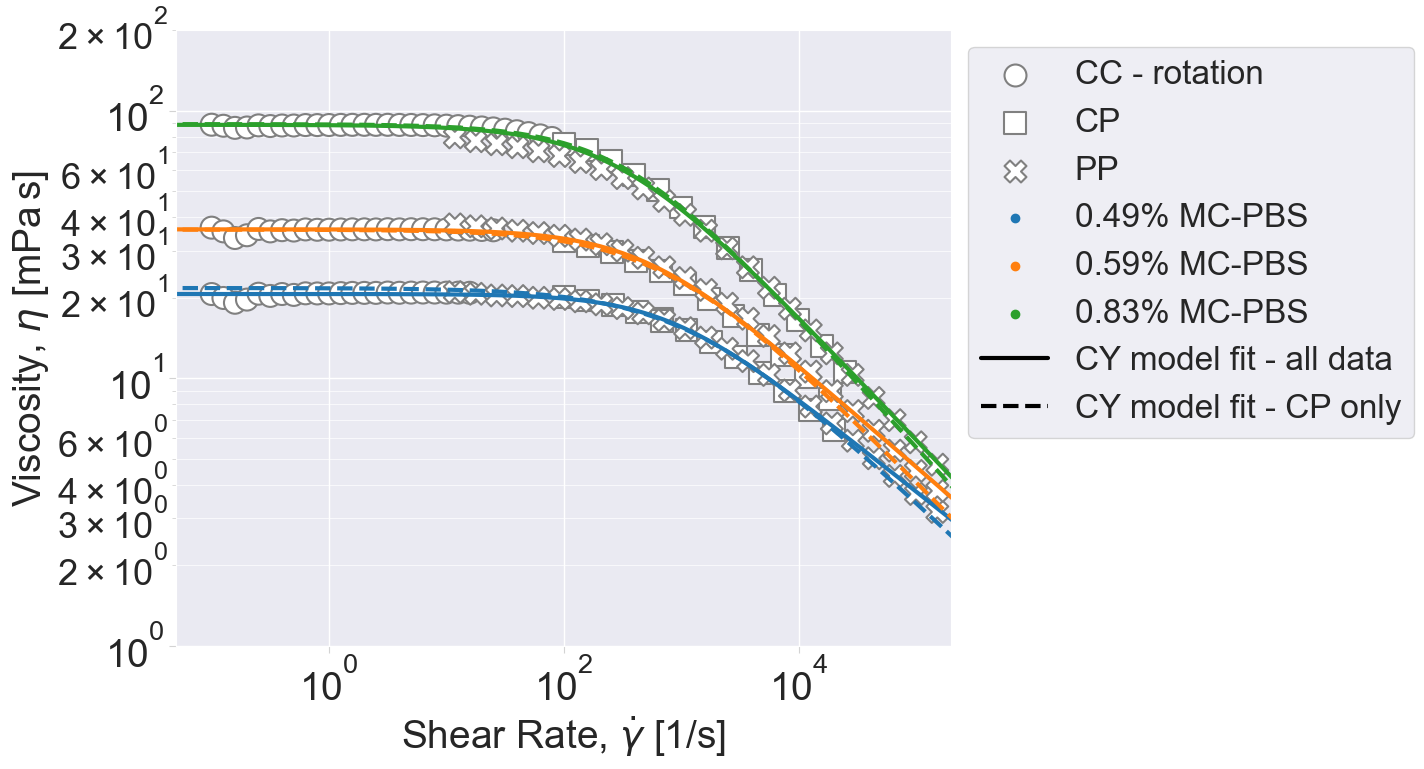

In [9]:
x_axis='Shear Rate'
y_axis='Viscosity'
plot_order = ['CC - rotation',
              'CP', 'PP']

fontsize = 28
concentrations = concatenated['Buffer'].unique()
colors = sns.color_palette('tab10', len(concentrations))

kws = {"s": 250, "linewidth": 1.5,
       "edgecolor": 'gray', "facecolor": "w"}

df_fit_params = pd.DataFrame()
df_fit_params_cp =pd.DataFrame()

with sns.axes_style('darkgrid'):
    fig = plt.figure(0, (10,8))
    ax = plt.subplot(111)

    sns.scatterplot(x=x_axis, y=y_axis, data=df_means,
                    #hue='Buffer', palette='tab10',
                    hue_order = plot_order,
                    style='Device',
                    style_order = plot_order,
                    markers=['o', 's', 'X'],
                    ax=ax,
                    **kws
                    )

    # perform carreau-yasuda fits
    for color, cc in zip(colors, concentrations):
        df_c = concatenated[concatenated['Buffer'] == cc]
        df_cp = df_mpl[df_mpl['Buffer']==cc]

        xdata = df_c['Shear Rate']
        ydata = df_c['Viscosity']
        xdata_cp = df_cp['Shear Rate']
        ydata_cp = df_cp['Viscosity']

        init_guess = [20, 1e-3, 0.6, 2] # initial guesses
        bounds=([0, 0, 0, 0], [np.inf,np.inf,1, np.inf]) #boundaries

        popt, pcov = curve_fit(cy_model_vis_inf_fixed, xdata, ydata,  maxfev=7000,  # fit with all data points
                               bounds=bounds,
                               p0=init_guess # initial guesses
                               )
        popt_cp, pcov_cp = curve_fit(cy_model_vis_inf_fixed, xdata_cp, ydata_cp,  maxfev=7000,  # fit with only CP data
                                     bounds=bounds,
                                     p0=init_guess # initial guesses
                                     )

        x_fit = np.logspace(-2,6, num=1000)
        ax.plot(x_fit, cy_model_vis_inf_fixed(x_fit, *popt), ls='-', color=color,
                lw=3,
                label='CY model-all data')
        ax.plot(x_fit, cy_model_vis_inf_fixed(x_fit, *popt_cp), ls='--', color=color,
                lw=3,
                label='CY model-only CP data')

        #print("{}, zero_viscosity={}".format(cc, popt[0]))
        fit_params = {'zero_viscosity': [popt[0]],
                      'zero_viscosity_err': [np.sqrt(np.diag(pcov)[0])],
                      'concentration': [cc],
                      'characteristic time': [popt[1]],
                      'char_time_err': [np.sqrt(np.diag(pcov)[1])],
                      'n': [popt[2]],
                      'n_err': [np.sqrt(np.diag(pcov)[2])],
                      'a': [popt[3]],
                      'a_err': [np.sqrt(np.diag(pcov)[3])]
                      }
        df_fit_params = pd.concat([df_fit_params, pd.DataFrame(fit_params)])

        fit_params_cp = {'zero_viscosity': [popt_cp[0]],
                         'zero_viscosity_err': [np.sqrt(np.diag(pcov_cp)[0])],
                         'concentration': [cc],
                         'characteristic time': [popt_cp[1]],
                         'char_time_err': [np.sqrt(np.diag(pcov_cp)[1])],
                         'n': [popt_cp[2]],
                         'n_err': [np.sqrt(np.diag(pcov_cp)[2])],
                         'a': [popt_cp[3]],
                         'a_err': [np.sqrt(np.diag(pcov_cp)[3])]
                         }
        df_fit_params_cp = pd.concat([df_fit_params_cp, pd.DataFrame(fit_params_cp)])

    ax.set(xscale='log', yscale='log')
    ax.set_xlim(0.05, 2e5)
    ax.set_ylim(1, 200)

    ax.tick_params(reset=True, axis='both', which='major', labelsize=fontsize, length=5,
                   top=False, right=False, color='lightgray')
    ax.tick_params(reset=True, axis='both', which='minor', labelsize=fontsize-2, length=3,
                   top=False, right=False, color='lightgray')

    ax.grid(visible=True, which='minor', axis='both', linewidth=0.5)
    ax.grid(visible=True, which='major', axis='both', linewidth=1)

    y_minor_formatter = LogFormatterSciNotation(base=10, labelOnlyBase=False, minor_thresholds=[3,0])
    ax.yaxis.set_minor_formatter(y_minor_formatter)

    plt.xlabel("Shear Rate, $\dot\gamma$ [1/s]", fontsize=fontsize)
    plt.ylabel("Viscosity, $\eta$ [mPa$\,$s]", fontsize=fontsize)

    # default legend markers are different than actual plot markers
    # create custom markers
    o_handle = plt.scatter([], [], marker='o', **kws, label='circle')
    #tri_handle = plt.scatter([], [], marker='^', **kws, label='triangle')
    square_handle = plt.scatter([], [], marker='s', **kws, label='square')
    x_handle = plt.scatter([], [], marker='X', **kws, label='X')
    b_1_handle = plt.scatter([], [], marker=None, color='tab:blue')
    b_2_handle = plt.scatter([], [], marker=None, color='tab:orange')
    b_3_handle = plt.scatter([], [], marker=None, color='tab:green')
    lines = ax.lines

    handles = [o_handle, square_handle, x_handle, b_1_handle, b_2_handle, b_3_handle] + lines[:2]
    labels = ['CC - rotation', 'CP', 'PP','0.49% MC-PBS', '0.59% MC-PBS', '0.83% MC-PBS', 'CY model fit - all data', 'CY model fit - CP only']

    # change color of the line handles to black
    # one legend marker for all three fit lines
    ax.legend(handles, labels, loc='upper left', bbox_to_anchor=[1,1], ncol=1, fontsize=24)
    leg = ax.get_legend()
    leg.legendHandles[-1].set_color('k')
    leg.legendHandles[-2].set_color('k')

    #savename = r"..\plots\figure_3\Figure_3"
    #fig.savefig(savename+".png", dpi=900, bbox_inches="tight")
    #fig.savefig(savename+".pdf", dpi=900, bbox_inches="tight")

    plt.show()

In [9]:
df_fit_params

zero_viscosity  zero_viscosity_err concentration  characteristic time  \
0       20.668023            0.053723  0.49% MC-PBS             0.001278   
0       36.039934            0.132900  0.59% MC-PBS             0.002095   
0       88.566099            0.430161  0.83% MC-PBS             0.003494   

   char_time_err         n     n_err         a     a_err  
0       0.000168  0.650285  0.015394  1.023602  0.060090  
0       0.000355  0.618408  0.020591  0.959243  0.068043  
0       0.000669  0.537956  0.027734  0.881482  0.058271

In [10]:
df_fit_params_cp

zero_viscosity  zero_viscosity_err concentration  characteristic time  \
0       21.758172            0.379401  0.49% MC-PBS             0.000812   
0       35.958567            1.083887  0.59% MC-PBS             0.001305   
0       89.107776            4.012995  0.83% MC-PBS             0.003063   

   char_time_err         n     n_err         a     a_err  
0       0.000216  0.583701  0.035178  0.754871  0.077551  
0       0.000385  0.556389  0.042817  0.793789  0.116176  
0       0.000480  0.515359  0.028902  0.885941  0.134971